In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import math
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt  
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
sns.set(style='white', context='notebook', palette='deep')
import warnings
def ignore_warn(*args, **kwargs):
    pass
Random_state=42
np.random.seed(0)

In [2]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.impute import KNNImputer
from sklearn.metrics import f1_score
from sklearn.ensemble import StackingClassifier

In [18]:
df = pd.read_csv('datasets/startup data.csv')
df.head(10)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,...,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,...,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,...,c:5192,0,0,1,1,0,1,3.5000,1,acquired
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,...,c:1043,1,0,1,0,0,1,4.0000,1,acquired
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,...,c:498,1,1,1,0,0,0,1.0000,1,acquired


In [3]:
dataset=pd.read_csv("datasets/startup data.csv",\
                    converters={'status': lambda x: int(x == 'acquired')},parse_dates=['founded_at','first_funding_at','last_funding_at'])
dataset.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,0


In [17]:
dataset=pd.read_csv("datasets/Startups.csv")
dataset.head()

,Company,Valuation,Valuation_date,Industry,Country
0,ByteDance,140.0,April-21,Internet,China
1,SpaceX,100.0,October-21,Aerospace,United States
2,Stripe,95.0,March-21,Financial services,United States / Ireland
3,Klarna,45.6,June-21,Fintech,Sweden
4,Canva,40.0,September-21,Graphic design,Australia


In [5]:
dataset.rename(columns={'status':'is_acquired'}, inplace=True)

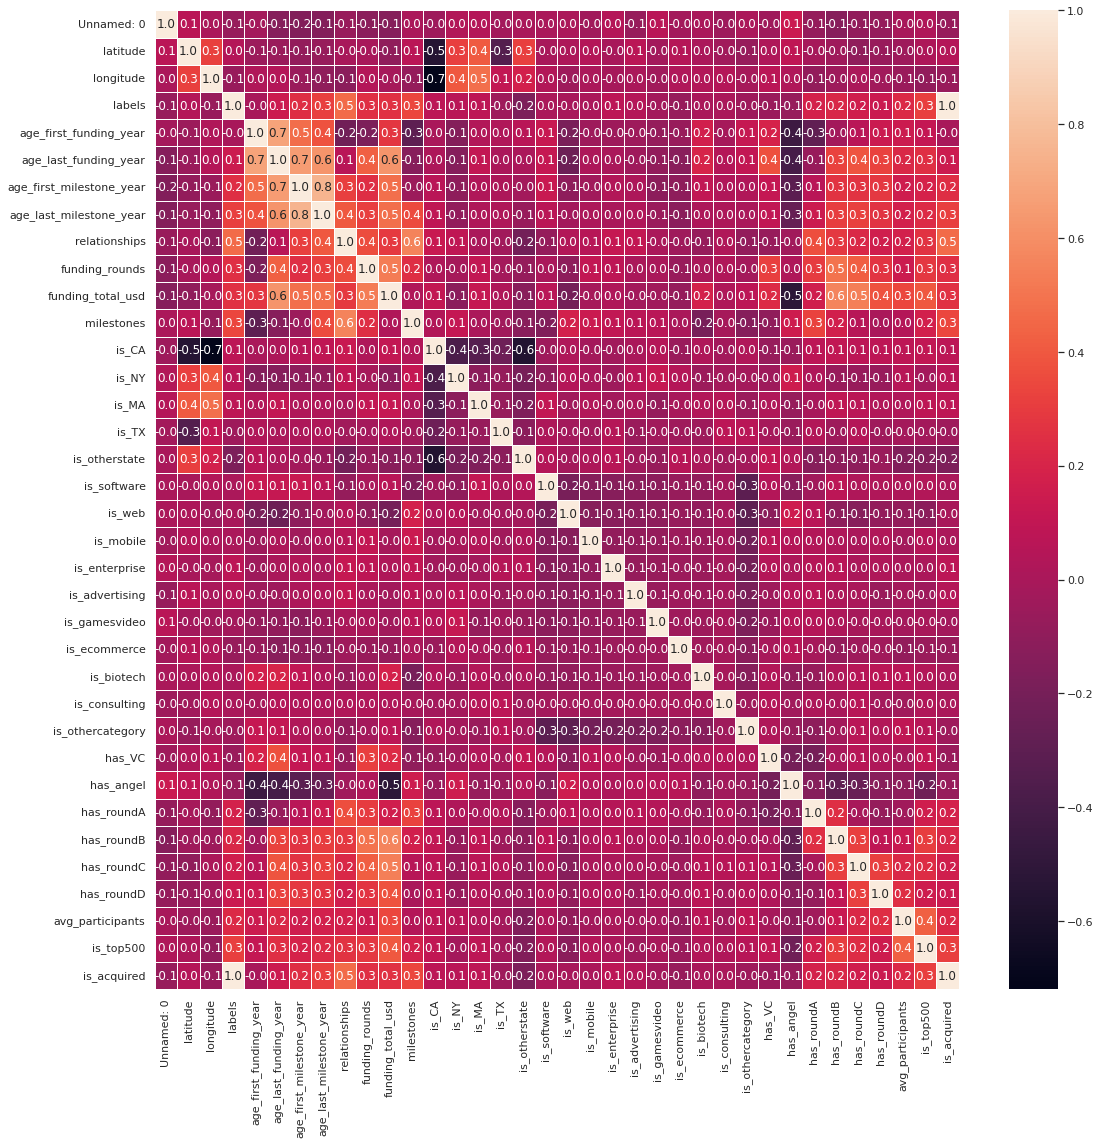

In [6]:
def draw_heatmap(dataset):
    
    
    f, ax = plt.subplots(figsize = (18, 18))
    
    corrMatt = dataset.corr(method='spearman')
    
    sns.heatmap(corrMatt, annot = True, linewidth = 0.5, fmt = '.1f', ax = ax)
    plt.show()
    
    
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
numerical_df_1=dataset.select_dtypes(numerics)
numerical_column_names = dataset.select_dtypes(numerics).columns

draw_heatmap(numerical_df_1)


In [7]:
def getOutliersMatrix(numerical_df, threshold=1.5):
    Q1 = numerical_df.quantile(0.25)
    Q3 = numerical_df.quantile(0.75)
    IQR = Q3 - Q1
    
    outdata = (numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))
    
    for name in numerical_df.columns:
        outdata.loc[(outdata[name] == True), name] = 1
        outdata.loc[(outdata[name] == False), name] = 0
    
    return outdata


outliersMatt = getOutliersMatrix(numerical_df_1)


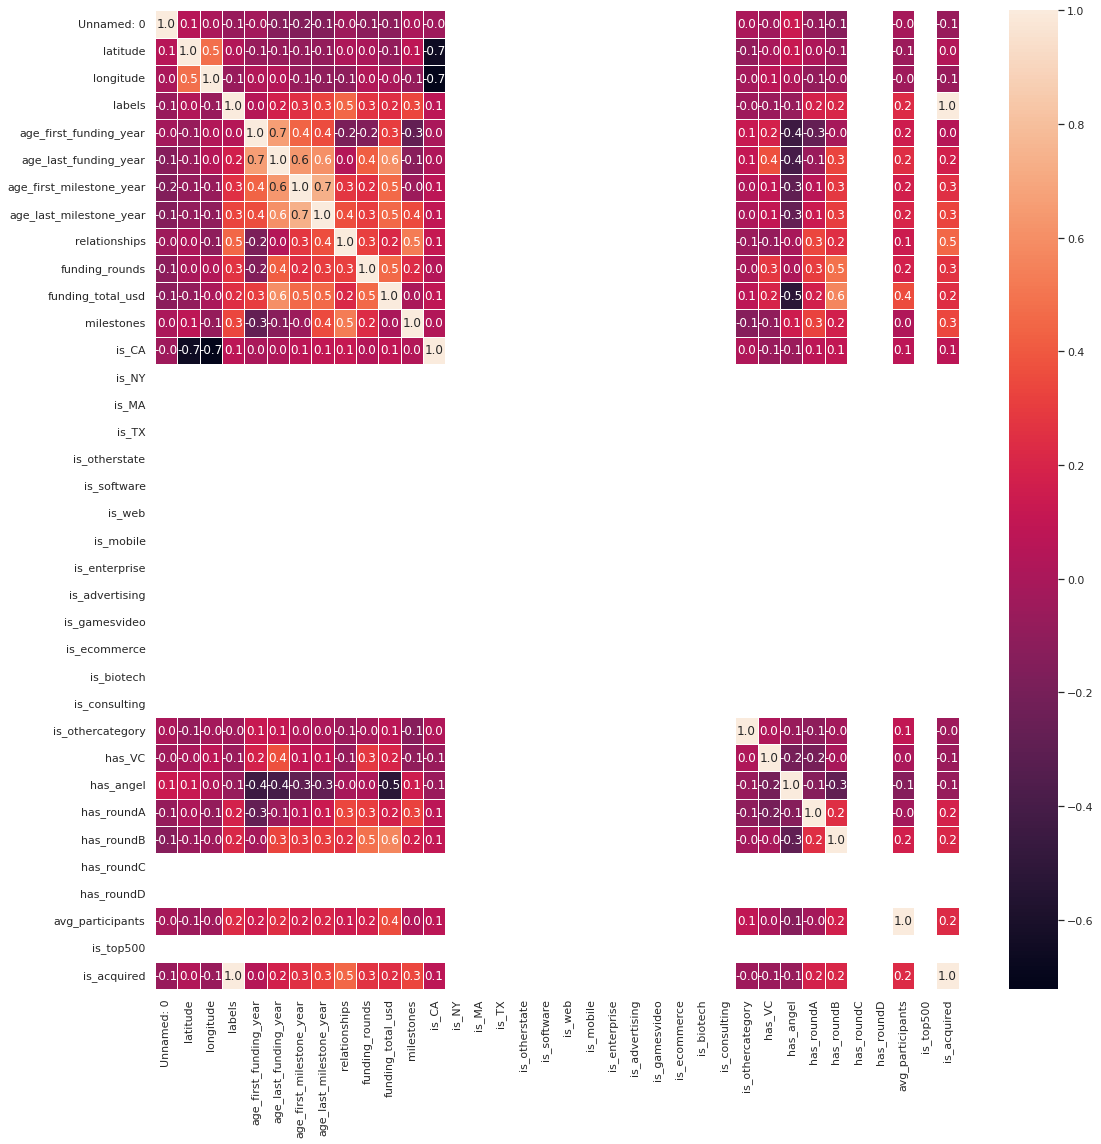

In [8]:
outliersMatt = getOutliersMatrix(numerical_df_1)

dataset[outliersMatt==1]= np.nan

numerical_df_2=dataset.select_dtypes(numerics)

draw_heatmap(numerical_df_2)

In [9]:
print(dataset.isnull().sum())

Unnamed: 0                    0
state_code                    0
latitude                     78
longitude                     4
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year       21
age_last_funding_year        12
age_first_milestone_year    169
age_last_milestone_year     159
relationships                60
funding_rounds               16
funding_total_usd            65
milestones                    1
state_code.1                  1
is_CA                         0
is_NY                       106
is_MA                        83
is_TX                        42
is_otherstate               204
category_code                 0
is_software                 153
is_web                      144
is_mobil

In [10]:
def imputing_numeric_missing_values(dataset,n_neighbors=10):
    numerical_column_names = dataset.select_dtypes([np.number]).columns
    knn= KNNImputer()
    knn_dataset= knn.fit_transform(dataset[numerical_column_names])
    
    dataset[numerical_column_names]=pd.DataFrame(knn_dataset)
    return dataset

dataset=imputing_numeric_missing_values(dataset)

numerical_df_3=dataset.select_dtypes(numerics)

print(dataset.isnull().sum())

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year      0
age_last_milestone_year       0
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [11]:
dataset['closed_at']=dataset['closed_at'].fillna('temporary')
dataset['closed_at'] = dataset.closed_at.apply(lambda x: 1 if x =='temporary' else 0)

In [12]:
dataset['months_between_first_and_last_funding'] = ((dataset.last_funding_at - dataset.first_funding_at)/np.timedelta64(1, 'M'))
dataset['months_between_foundation_and_first_funding']=((dataset.first_funding_at - dataset.founded_at)/np.timedelta64(1, 'M'))

In [13]:
dataset.drop(["last_funding_at"],axis=1, inplace=True)
dataset.drop(["first_funding_at"], axis=1, inplace=True)
dataset.drop(["founded_at"], axis=1, inplace=True)


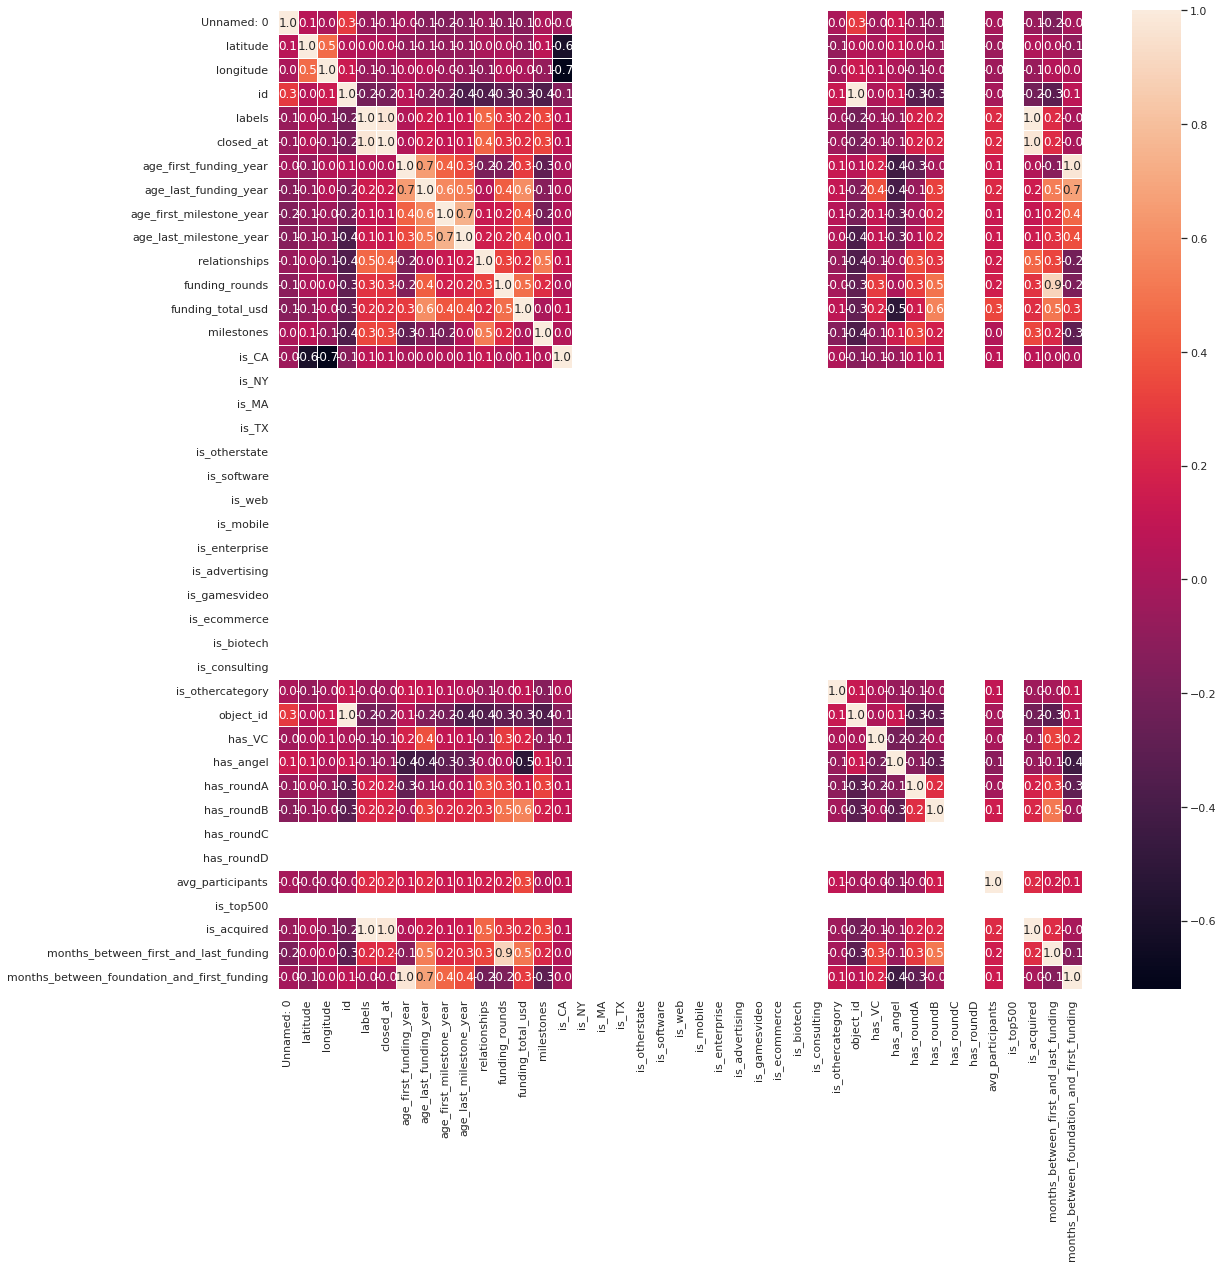

In [14]:
dataset['object_id'] = dataset['object_id'].str.replace("c:", '').astype(int)
dataset['id'] = dataset['id'].str.replace("c:", '').astype(int)

numerical_df_4=dataset.select_dtypes(numerics)
draw_heatmap(numerical_df_4)

corr_matrix = numerical_df_4.corr().abs()

upper = corr_matrix.loc["is_acquired"]
upper=upper.fillna(0)
upper=upper.to_dict()
to_drop = [key for key in upper if upper[key]< 0.2]


In [15]:
print(to_drop)

['Unnamed: 0', 'latitude', 'longitude', 'id', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'funding_total_usd', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA', 'has_roundC', 'has_roundD', 'is_top500', 'months_between_foundation_and_first_funding']
